# 🍕 Welcome to my Pizza Sales Analysis!

<img src="https://cdn.britannica.com/08/177308-050-94D9D6BE/Food-Pizza-Basil-Tomato.jpg" alt="Markdown">

<div style="background-color: #E5E4E2; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
<p>For the Maven Pizza Challenge, you’ll be playing the role of a BI Consultant hired by Plato's Pizza, a Greek-inspired pizza place in New Jersey. You've been hired to help the restaurant use data to improve operations, and just received the following note:
<blockquote style="border-left: 3px solid #C4A484;">
Welcome aboard, we're glad you're here to help!<br>

Things are going OK here at Plato's, but there's room for improvement. We've been collecting transactional data for the past year, but really haven't been able to put it to good use. Hoping you can analyze the data and put together a report to help us find opportunities to drive more sales and work more efficiently.</blockquote></p>
<p>In this notebook, we will take a look at a dataset of Pizza Sales. To do so, we will use the following dataset: <code>Data Model - Pizza Sales.xlsx</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/datasets/shilongzhuang/pizza-sales">here</a>.</p>

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>Data Model - Pizza Sales.xlsx</b></div>
    This pizza sales dataset make up 12 relevant features:
<ul>
    <li><b>order_id:</b> Unique identifier for each order placed by a table.</li>
    <li><b>order_details_id:</b> Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases).</li>
    <li><b>pizza_id:</b> Unique key identifier that ties the pizza ordered to its details, like size and price.</li>
    <li><b>quantity:</b> Quantity ordered for each pizza of the same type and size.</li>
    <li><b>order_date:</b> Date the order was placed (entered into the system prior to cooking & serving).</li>
    <li><b>order_time:</b> Time the order was placed (entered into the system prior to cooking & serving).</li>
    <li><b>unit_price:</b> Price of the pizza in USD.</li>
    <li><b>total_price:</b> unit_price * quantity.</li>
    <li><b>pizza_size:</b> Size of the pizza (Small, Medium, Large, X Large, or XX Large).</li>
    <li><b>pizza_category:</b> Category of the pizza (Classic, Supreme, Veggie, or Chicken).</li>
    <li><b>pizza_ingredients:</b> ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not specified; and they all include Tomato Sauce, unless another sauce is specified).</li>
    <li><b>pizza_name:</b> Name of the pizza as shown in the menu.</li>
</ul>
    </div>

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

# [Import dataset](https://www.kaggle.com/datasets/shilongzhuang/pizza-sales)

In [2]:
df = pd.read_excel('Data Model - Pizza Sales.xlsx')
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# Explore the dataset

In [3]:
df.shape

(48620, 12)

In [4]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 5px 5px 25px; line-height: 1.6;">

- <b>Categorical data:</b> pizza_size,	pizza_category,	pizza_ingredients,	pizza_name
- <b>Numerical data:</b> quantity, unit_price,	total_price

In [6]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


# Data Cleaning

In [7]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
number_of_pizza = df.pizza_name.nunique()
print(f"Plato's Pizza sells {number_of_pizza} types of pizzas!")

Plato's Pizza sells 32 types of pizzas!


There is nothing to clean. We are all set for the next stage: data analysis!

# Exploratory Data Analysis (EDA)

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
<div style="font-size:20px"><b>We would like to explore these questions:</b></div>

1. For each order, what is their total price?
2. Which size of pizza is ordered the most?
3. Which category of pizza is ordered the most?
4. What days and times do we tend to be busiest?
5. How many pizzas are we making during peak periods?
6. What are our best and worst-selling pizzas?
7. What's our average order value?
8. What is the total revenue up to the latest order date?
9. What is the total number of orders up to the latest order date?
10. Visualize the number of orders per day
11. Visualize revenue earned per day
12. Which month was revenue earned the highest?
    
    </div>

### 1. For each order, what is their total price?

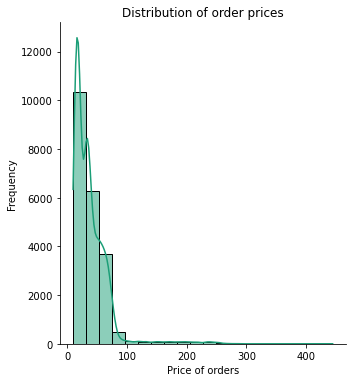

In [10]:
order_price = df.groupby(['order_id']).agg({'total_price':'sum'})
sns.displot(order_price, bins=20, palette = "Dark2", legend = False, kde = True)
plt.xlabel('Price of orders')
plt.ylabel('Frequency')
plt.title('Distribution of order prices');

### 2. Which size of pizza is ordered the most?

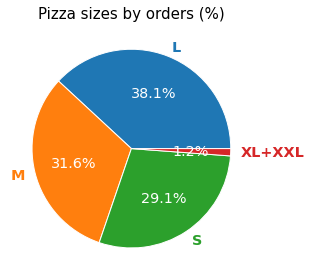

In [11]:
total = len(df) # total number of orders
L = len(df[df.pizza_size == 'L']) / total # % of Large pizzas to total no. of orders
M = len(df[df.pizza_size == 'M']) / total # % of Medium pizzas to total no. of orders
S = len(df[df.pizza_size == 'S']) / total # % of Small pizzas to total no. of orders
XL = len(df[df.pizza_size == 'XL']) / total # % of Extra Large pizzas to total no. of orders
XXL = len(df[df.pizza_size == 'XXL']) / total # % of Extra Extra Large pizzas to total no. of orders

# Plot the pie chart
figure, ax = plt.subplots()
patches, texts, pcts = ax.pie([L,M,S,XL+XXL], 
                              labels = ["L","M","S","XL+XXL"],
                              autopct = '%.1f%%',
                              wedgeprops={'linewidth':1.0, 'edgecolor': 'white'},
                              textprops = {'size': 'x-large'},
                              shadow = False)

# Title of pie chart
ax.set_title('Pizza sizes by orders (%)', fontsize = 15)

# Annotation
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight = 600)

# Show the pie chart
plt.tight_layout();

### 3. Which category of pizza is ordered the most?

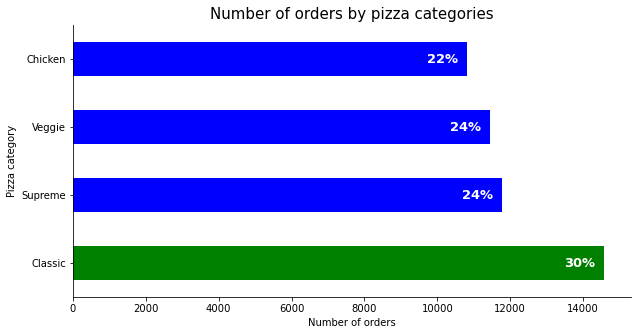

In [12]:
# Show the number of orders for each category of pizza
categories = df.pizza_category.value_counts()

# Find the index of the highest value (highest number of orders)
highest_index = categories.idxmax()

# Set the color of the highest bar to green, and others to blue color
colors = ['green' if i == highest_index else 'blue' for i in categories.index]

# Plot the bar chart
plots = categories.plot.barh(figsize = (10,5), color = colors)
plt.ylabel('Pizza category')
plt.xlabel('Number of orders')
plt.title('Number of orders by pizza categories', fontsize = 15)

# Total number of orders
total = len(df)

# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # y-coordinate: bar.get_y() + bar.get_width() / 2
  # x-coordinate: bar.get_width()
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_width() / total, '.0%'),
                   (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                    ha='center', va='center',
                   size=13, xytext=(-25, 0),
                   textcoords='offset points', color = 'white', fontweight = 600)
    
# Hide the right and top spines
plots.spines[['right', 'top']].set_visible(False);

### 4. What days and times do we tend to be busiest?
### 5. How many pizzas are we making during peak periods?

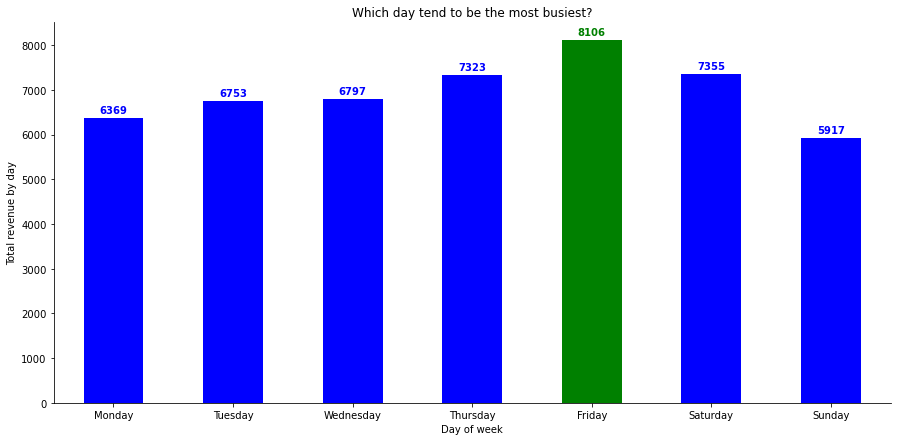

In [13]:
# Add two new columns to df: day_of_week, day_name
day_of_week = []
day_name = []

for i in range(len(df)):
    # 0 = Mon, 1 = Tue, 2 = Wed, ..., 6 = Sun
    day_of_week.append(df.order_date[i].dayofweek)
    
    # Monday, Tuesday, ..., Sunday
    day_name.append(df.order_date[i].day_name()) 

df['day_of_week'] = day_of_week
df['day_name'] = day_name

# Count number of orders by each day
busiest_day_df = df.groupby(['day_of_week','day_name']).count().sort_index(ascending=True).reset_index().set_index('day_of_week')

# Find the index of the highest value (highest number of orders by day)
highest_index = busiest_day_df['total_price'].idxmax()

# Set the color of the highest bar to green, and others to blue color
colors = ['green' if i == highest_index else 'blue' for i in busiest_day_df.index]

# Plot the bar chart
ax = busiest_day_df.plot.bar(x = 'day_name', y = 'total_price', figsize = (15,7), legend=False, color = colors)
plt.ylabel("Total revenue by day")
plt.xlabel("Day of week")
plt.title("Which day tend to be the most busiest?")
ax.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
                  rotation = 0);

# Iterating over the bars one-by-one
for i, bar in enumerate(ax.patches):
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
                size=10, xytext=(0, 8),
                textcoords='offset points', color = colors[i], fontweight = 600)
    
# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False);

In [14]:
# Now we look to investigate Friday times.
friday_df = df[df.day_name == 'Friday']
friday_df

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,day_name
161,162,70,ital_veggie_s,1,2015-01-02,11:38:51,12.75,12.75,S,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ...",The Italian Vegetables Pizza,4,Friday
162,163,70,soppressata_l,1,2015-01-02,11:38:51,20.75,20.75,L,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",The Soppressata Pizza,4,Friday
163,164,71,thai_ckn_l,1,2015-01-02,11:40:50,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza,4,Friday
164,165,72,spinach_fet_l,1,2015-01-02,11:57:25,20.25,20.25,L,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G...",The Spinach and Feta Pizza,4,Friday
165,166,73,thai_ckn_s,1,2015-01-02,11:58:56,12.75,12.75,S,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza,4,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47252,47253,20767,cali_ckn_s,1,2015-12-18,22:05:48,12.75,12.75,S,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza,4,Friday
47253,47254,20767,sicilian_s,1,2015-12-18,22:05:48,12.25,12.25,S,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza,4,Friday
47254,47255,20768,big_meat_s,1,2015-12-18,22:06:22,12.00,12.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza,4,Friday
47255,47256,20769,classic_dlx_m,1,2015-12-18,22:29:17,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,4,Friday


In [15]:
# Convert order_time into datetime data type
friday_df.order_dummydatetime = pd.to_datetime(friday_df.order_time, format = '%H:%M:%S')

# Define the bins
bins = np.arange(0,26,2)
print(bins)

# Add labels (12 bins, each bin represents 2 hours window)
labels = ['00:00-01:59', '02:00-03:59', '04:00-05:59', '06:00-07:59','08:00-09:59','10:00-11:59',
         '12:00-13:59', '14:00-15:59', '16:00-17:59','18:00-19:59','20:00-21:59','22:00-23:59']

# Add the bins to friday_df
friday_df['time_bin'] = pd.cut(friday_df.order_dummydatetime.dt.hour, bins, labels=labels, right=False)

[ 0  2  4  6  8 10 12 14 16 18 20 22 24]


C:\Users\User\AppData\Local\Temp\ipykernel_11976\2265003301.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  friday_df.order_dummydatetime = pd.to_datetime(friday_df.order_time, format = '%H:%M:%S')
C:\Users\User\AppData\Local\Temp\ipykernel_11976\2265003301.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  friday_df['time_bin'] = pd.cut(friday_df.order_dummydatetime.dt.hour, bins, labels=labels, right=False)


In [16]:
friday_df

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_week,day_name,time_bin
161,162,70,ital_veggie_s,1,2015-01-02,11:38:51,12.75,12.75,S,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ...",The Italian Vegetables Pizza,4,Friday,10:00-11:59
162,163,70,soppressata_l,1,2015-01-02,11:38:51,20.75,20.75,L,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",The Soppressata Pizza,4,Friday,10:00-11:59
163,164,71,thai_ckn_l,1,2015-01-02,11:40:50,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza,4,Friday,10:00-11:59
164,165,72,spinach_fet_l,1,2015-01-02,11:57:25,20.25,20.25,L,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G...",The Spinach and Feta Pizza,4,Friday,10:00-11:59
165,166,73,thai_ckn_s,1,2015-01-02,11:58:56,12.75,12.75,S,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza,4,Friday,10:00-11:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47252,47253,20767,cali_ckn_s,1,2015-12-18,22:05:48,12.75,12.75,S,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza,4,Friday,22:00-23:59
47253,47254,20767,sicilian_s,1,2015-12-18,22:05:48,12.25,12.25,S,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza,4,Friday,22:00-23:59
47254,47255,20768,big_meat_s,1,2015-12-18,22:06:22,12.00,12.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza,4,Friday,22:00-23:59
47255,47256,20769,classic_dlx_m,1,2015-12-18,22:29:17,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,4,Friday,22:00-23:59


In [17]:
# The number of orders during each time bin
orders_per_bin = pd.DataFrame(friday_df.time_bin.value_counts())
orders_per_bin.reset_index(inplace=True)
orders_per_bin.columns = ['time_bin','count']
orders_per_bin['time_bin'] = pd.Categorical(orders_per_bin['time_bin'], categories=labels, ordered=True)
sorted_df = orders_per_bin.sort_values('time_bin', ascending=False).reset_index(drop=True)

# Display the DataFrame (sorted by time bins from 12am to 11:59pm)
sorted_df.set_index("time_bin", inplace=True)
sorted_df

,count
time_bin,
22:00-23:59,404
20:00-21:59,1308
18:00-19:59,1662
16:00-17:59,1324
14:00-15:59,945
12:00-13:59,2084
10:00-11:59,379
08:00-09:59,0
06:00-07:59,0


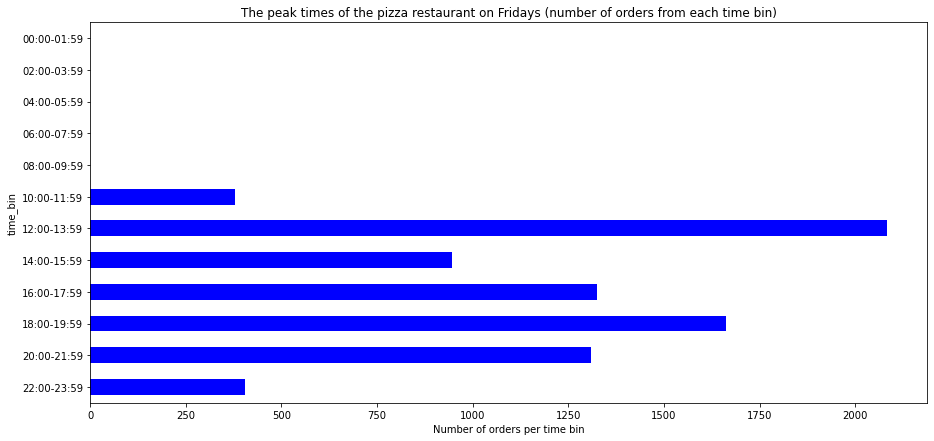

In [18]:
sorted_df.plot.barh(legend = False, figsize = (15,7), color = 'blue')
plt.xlabel('Number of orders per time bin')
plt.title("The peak times of the pizza restaurant on Fridays (number of orders from each time bin)");

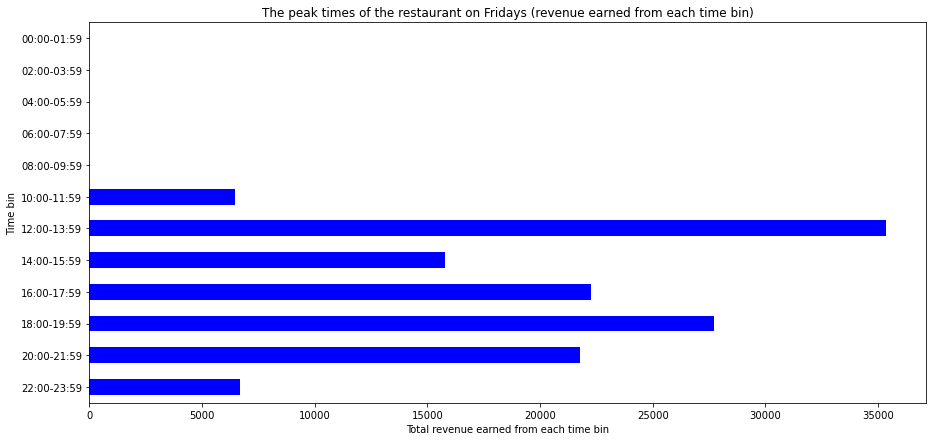

In [19]:
# Revenue earned from each time bin
revenue_friday_df = pd.DataFrame(friday_df.groupby('time_bin').total_price.sum())
revenue_friday_df.reset_index(inplace=True)
revenue_friday_df = revenue_friday_df.sort_values("time_bin",ascending=False)
revenue_friday_df.set_index("time_bin").plot.barh(figsize = (15,7), legend = False, color = 'blue')
plt.xlabel("Total revenue earned from each time bin")
plt.ylabel("Time bin")
plt.title("The peak times of the restaurant on Fridays (revenue earned from each time bin)");

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">

- Peak day: **Friday**
- Peak times: **12pm - 2pm**, **6pm - 8pm**
- Number of pizza made in peak period (12pm - 2pm): **2084**

### 6. What are our best and worst selling pizzas?

In [20]:
print(f'The best selling pizza is: {df.pizza_name.value_counts().nlargest(1)}' '\n')
print(f'The worst selling pizza is : {df.pizza_name.value_counts().nsmallest(1)}')

The best selling pizza is: The Classic Deluxe Pizza    2416
Name: pizza_name, dtype: int64

The worst selling pizza is : The Brie Carre Pizza    480
Name: pizza_name, dtype: int64


### 7. What's our average order value?

In [21]:
print(f'Mean: USD {df.total_price.mean():.2f}')
print(f'Median: USD {df.total_price.median():.2f}')

Mean: USD 16.82
Median: USD 16.50


### 8. What is the total revenue up to the latest order date?

In [22]:
df.total_price.sum()

817860.05

### 9. What is the total number of orders up to the latest order date?

In [23]:
len(df)

48620

### 10. Visualize the number of orders per day

In [24]:
df.groupby('order_date').agg({'order_id': 'count'}).sort_values('order_id', ascending=False)

,order_id
order_date,
2015-11-26,261
2015-11-27,259
2015-10-15,258
2015-07-04,233
2015-07-03,207
...,...
2015-12-27,87
2015-11-22,82
2015-12-29,77


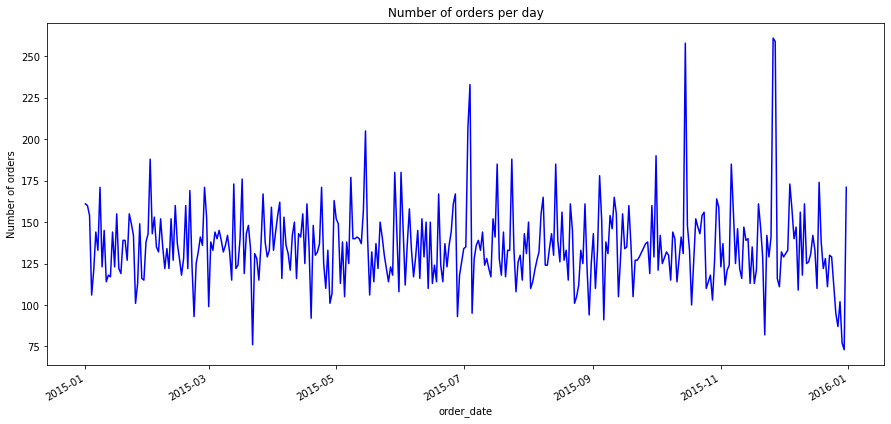

In [25]:
df.groupby('order_date').agg({'order_id': 'count'}).plot(kind = 'line', figsize=(15,7), legend=False, color="blue")
plt.ylabel('Number of orders')
plt.title('Number of orders per day');

### 11. Visualize revenue earned per day

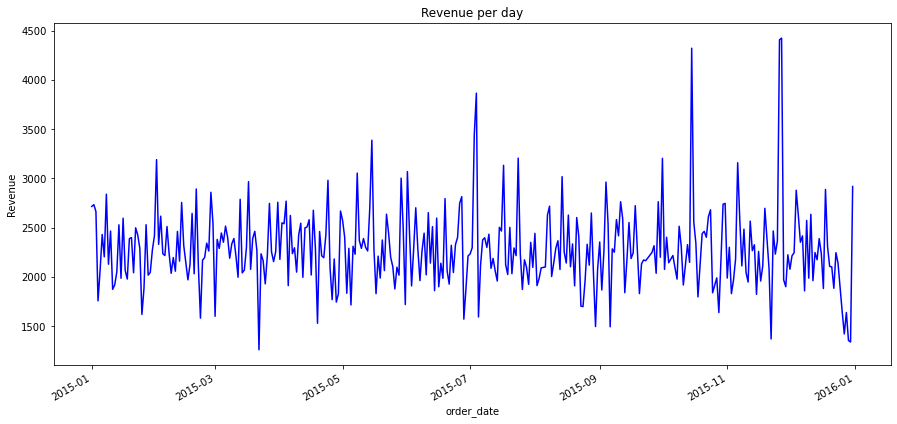

In [26]:
df.groupby('order_date').agg({'total_price': 'sum'}).plot(kind = 'line', figsize=(15,7), legend=False, color="blue")
plt.ylabel('Revenue')
plt.title('Revenue per day');

### 12. Which month was revenue earned the highest?

In [27]:
# Extract the month and month_name from order_date
month = []
month_name = []
for i in df.order_date:
    # 1 = January, 2 = February, ..., 12 = December
    month.append(i.month)
    
    # January, February, ..., December
    month_name.append(i.month_name())
    
df['month'] = month
df['month_name'] = month_name
total_revenue = df.total_price.sum() # total revenue = sum of prices of all orders

# Create a colormap from red to yellow
cmap = mcolors.LinearSegmentedColormap.from_list("", ["green", "yellow", "red"])

# Find the total revenue by each month using groupby
revenue_per_month_df = df.groupby(['month', 'month_name']).agg({'total_price': 'sum'})

# Rank the monthly total revenue from highest to lowest
revenue_per_month_df['rank'] = revenue_per_month_df['total_price'].rank(method="dense", ascending=False)

# Sort from the lowest revenue to the highest revenue
revenue_per_month_df = revenue_per_month_df.sort_values('rank', ascending=False).reset_index()
revenue_per_month_df

,month,month_name,total_price,rank
0,10,October,64027.60,12.0
1,9,September,64180.05,11.0
2,12,December,64701.15,10.0
3,2,February,65159.60,9.0
4,6,June,68230.20,8.0
5,8,August,68278.25,7.0
6,4,April,68736.80,6.0
7,1,January,69793.30,5.0
8,11,November,70395.35,4.0
9,3,March,70397.10,3.0


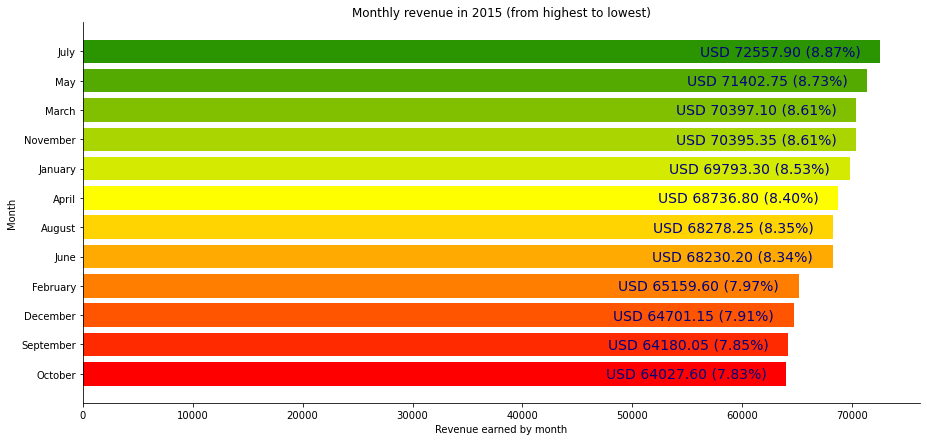

In [28]:
# Plot the bar chart
fig, ax = plt.subplots(figsize = (15,7))
ax.barh(revenue_per_month_df.month_name, revenue_per_month_df['total_price'],
        color=cmap(revenue_per_month_df['rank']/12))
ax.set_ylabel('Month')
ax.set_xlabel('Revenue earned by month')
ax.set_title('Monthly revenue in 2015 (from highest to lowest)')

# Annotation: iterating over the bars one-by-one
for i, bar in enumerate(ax.patches):
    ax.annotate(f"USD {revenue_per_month_df['total_price'][i]:.2f} ({bar.get_width() / total_revenue:.2%})",
                   (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                    ha='center', va='center',
                   size=14, xytext=(-100, 0),
                   textcoords='offset points', color = 'navy', fontweight = 400)
    
# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False);

# 💡 Conclusion 💡

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    
<h3>1. For each order, what is their total price?</h3>
    <p style = "font-size: 16px;line-height: 0.05; padding-left: 20px">Most customers place an order with prices around USD 10 to USD 25.</p>
<h3>2. Which size of pizza is ordered the most?</h3>
    <p style = "font-size: 16px;line-height: 0.05; padding-left: 20px">Large</p>
<h3>3. Which category of pizza is ordered the most?</h3>
    <p style = "font-size: 16px;line-height: 0.05; padding-left: 20px">Classic</p>
<h3>4. What days and times do we tend to be busiest?</h3>
    <p style = "font-size: 16px;line-height: 0.05; padding-left: 20px">Friday (12pm - 2pm, 6pm - 8pm)</p>
<h3>5. How many pizzas are we making during peak periods?</h3>
    <p style = "font-size: 16px;line-height: 0.05; padding-left: 20px">2084 number of pizzas (at Friday 12pm - 2pm)</p>
<h3>6. What are our best and worst-selling pizzas?</h3>
    <p style = "font-size: 16px;line-height: 0.05; padding-left: 20px">Best-selling pizza: The Classic Deluxe Pizza</p>
    <p style = "font-size: 16px;line-height: 0.8; padding-left: 20px">Worst-selling pizza: The Brie Carre Pizza</p>
<h3>7. What's our average order value?</h3>
    <p style = "font-size: 16px;line-height: 0.05; padding-left: 20px">Mean: USD 16.82</p>
    <p style = "font-size: 16px;line-height: 0.8; padding-left: 20px">Median: USD 16.50</p>
<h3>8. What is the total revenue up to the latest order date?</h3>
    <p style = "font-size: 16px;line-height: 0.05; padding-left: 20px">USD 817,860.05</p>
<h3>9. What is the total number of orders up to the latest order date?</h3>
    <p style = "font-size: 16px;line-height: 0.05; padding-left: 20px">48620 number of orders.</p>
<h3>10. Visualize the number of orders per day</h3>
    <p style = "font-size: 16px;line-height: 0.05; padding-left: 30px">The graph shows that daily number of orders fluctuates frequently with notable peaks at the dates:</p>
        <ul style = "font-size: 16px; padding-left:50px;">
            <li>2015-11-26 (261 orders)</li>
            <li>2015-11-27 (259 orders)</li>
            <li>2015-10-15 (258 orders)</li>
        </ul>
    <p style = "font-size: 16px;line-height: 0.05; padding-left: 30px;">A few days which have significantly low number of orders are:</p>
    <ul style = "font-size: 16px; padding-left:50px;">
            <li>2015-12-30 (73 orders)</li>
            <li>2015-03-22 (76 orders)</li>
            <li>2015-12-29 (77 orders)</li>
        </ul>
        <p style = "font-size: 16px;line-height: 1.35; padding-left: 30px;margin-top: 6px">Further analysis could be conducted via time series analysis (e.g. Looking into autocorrelation function, identifying a suitable time series model and predict number of orders for the next month/year).</p>
<h3>11. Visualize revenue earned per day</h3>
    <p style = "font-size: 16px;line-height: 1.35;padding-left:30px;margin-top: 6px">The graph seems to have very similar pattern to the graph of daily number of orders. This implies that number of orders is directly proportional to revenue earned. This is reasonable as the number of orders increases, revenue increases.</p>
<h3>12. Which month was revenue earned the highest?</h3>
    <p style = "font-size: 16px;line-height: 0.05; padding-left: 30px">July</p>
    </div>